# LIBRARIES

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATA

## Loading

In [9]:
%cd /home/think/Desktop/5x4_sample

/home/think/Desktop/5x4_sample


In [10]:
all_x20 = pd.read_csv('5x4_df_samples.csv')
all_x20.drop(all_x20.columns[[0]], axis=1, inplace=True)
all_x20.head()

,id,x,y,z
0,1,0.100000,0.100000,0.100000
1,1,0.097913,0.101250,0.096328
2,1,0.095850,0.102482,0.092863
3,1,0.093809,0.103694,0.089594
4,1,0.091790,0.104888,0.086511


In [11]:
lookup_x20 = pd.read_csv('5x4_df_lookup.csv')
lookup_x20.drop(lookup_x20.columns[[0]], axis=1, inplace=True)
lookup_x20.head()

,id,sample_name,ic_x,ic_y,ic_z,params
0,1,rossler,0.1,0.1,0.1,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
1,2,rossler,0.2,0.2,0.2,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
2,3,rossler,0.3,0.3,0.3,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
3,4,rossler,0.4,0.4,0.4,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
4,5,lorenz63,0.1,0.1,0.1,"{'sigma': 10, 'beta': 2.6666666666666665, 'rho..."


In [16]:
#rossler_sample_1 = all_x20[all_x20['id'] == 1].copy()
#rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x', 'y'] ].copy()
rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x'] ].copy()

In [17]:
rossler_sample_1

,x
0,0.100000
1,0.097913
2,0.095850
3,0.093809
4,0.091790
...,...
9995,-3.812888
9996,-3.773334
9997,-3.733280
9998,-3.692730


## Scaling

In [18]:
# Apply a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rossler_sample_1_scaled = pd.DataFrame(scaler.fit_transform(rossler_sample_1), columns = ['x'])

In [19]:
rossler_sample_1_scaled

,x
0,0.448117
1,0.448015
2,0.447914
3,0.447815
4,0.447717
...,...
9995,0.257544
9996,0.259470
9997,0.261421
9998,0.263396


## Visualization

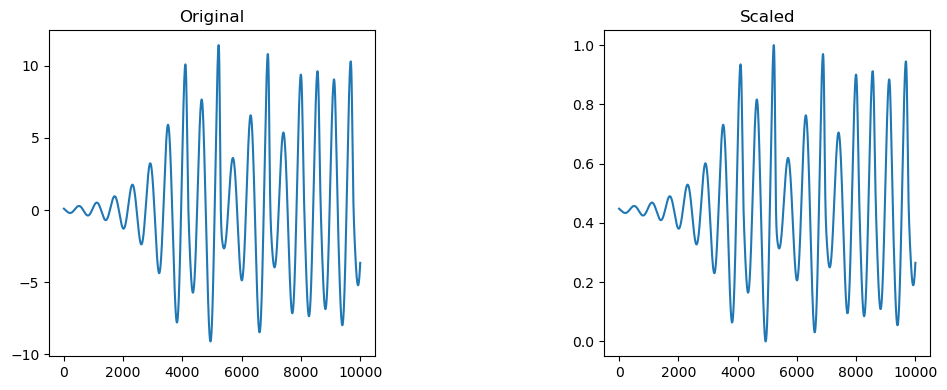

In [25]:
# import matplotlib.pyplot as plt

# # Calculate global min and max for y-axis limits
# y_min = min(rossler_sample_1['x'].min(), rossler_sample_1_scaled['x'].min())
# y_max = max(rossler_sample_1['x'].max(), rossler_sample_1_scaled['x'].max())

# # Create subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# # Plot original
# rossler_sample_1['x'].plot(ax=axs[0], title='Original')
# axs[0].set_ylim(y_min, y_max)

# # Plot scaled
# rossler_sample_1_scaled['x'].plot(ax=axs[1], title='Scaled')
# axs[1].set_ylim(y_min, y_max)

# plt.tight_layout()
# plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot original
rossler_sample_1['x'].plot(ax=axs[0], title='Original')
# Plot scaled
rossler_sample_1_scaled['x'].plot(ax=axs[1], title='Scaled')

# Let each subplot auto-scale its own y-axis
# But make sure they use the same "physical size" vertically
for ax in axs:
    ax.set_box_aspect(1)  # Makes both plots square in aspect ratio

plt.tight_layout()
plt.show()


## Training and Test Split

### Truncation, Is it that relevant?

In [ ]:
# Count decimal digits per value
decimal_lengths = rossler_sample_1_scaled['x'].apply(lambda v: len(str(v).split('.')[-1]) if '.' in str(v) else 0)

# Check if all are the same
unique_lengths = decimal_lengths.unique()

print("Unique decimal lengths:", unique_lengths)

if len(unique_lengths) == 1:
    print(f"✅ All values have {unique_lengths[0]} digits after the decimal.")
else:
    print("❌ Values have varying decimal lengths.")

In [27]:
Full = rossler_sample_1_scaled['x'].values

In [46]:
n_samples = len(Full)
train_size = int(0.80 * n_samples)

train_data = Full[:train_size]
test_data = Full[train_size:]


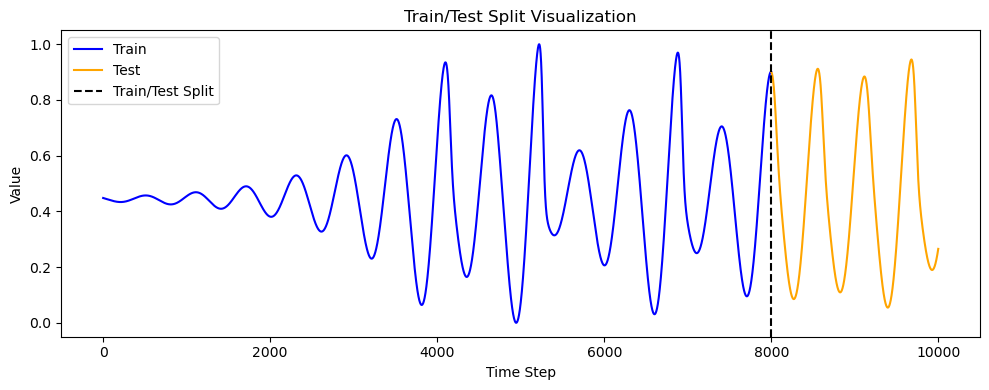

In [54]:
# Define x-axis ranges based on the lengths
train_end = len(train_data)
x_train = np.arange(train_end)
x_test = np.arange(train_end, train_end + len(test_data))
# Plot
plt.figure(figsize=(10, 4))
plt.plot(x_train, train_data, label='Train', color='blue')
plt.plot(x_test, test_data, label='Test', color='orange')

# Optional vertical line to indicate the split
plt.axvline(x=train_end, color='black', linestyle='--', label='Train/Test Split')

plt.legend()
plt.title("Train/Test Split Visualization")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Vanilla Neural Network

In [189]:
full_array = rossler_sample_1['x'].values
last_twenty = full_array[-200:]
mochado = full_array[:-200]

**MLP MODEL**

In [190]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
      # find the end of this pattern
      end_ix = i + n_steps
      # check if we are beyond the sequence
      if end_ix > len(sequence)-1:
         break
      # gather input and outpu parts of the pattern
      seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
      X.append(seq_x)
      y.append(seq_y)

    return array(X), array(y)

In [191]:
# choose a number of time steps
n_steps = 1
# split into samples
# transform to a supervised learning problem
X, y = split_sequence(mochado, n_steps)
# show each example
for i in range(len(X)):
   print(X[i], y[i])

[0.44811656] 0.4480149030581577
[0.4480149] 0.4479144317814097
[0.44791443] 0.44781505755579926
[0.44781506] 0.4477166925672069
[0.44771669] 0.4476192540214631
[0.44761925] 0.447522663292553
[0.44752266] 0.44742681150329144
[0.44742681] 0.4473316282211968
[0.44733163] 0.44723706990745105
[0.44723707] 0.44714309354190457
[0.44714309] 0.44704965662307633
[0.44704966] 0.44695671716815405
[0.44695672] 0.4468642337129939
[0.44686423] 0.4467721653121208
[0.44677217] 0.4466804715387281
[0.44668047] 0.44658911248467786
[0.44658911] 0.4464980487605008
[0.44649805] 0.4464072414953961
[0.44640724] 0.4463166523372317
[0.44631665] 0.44622624345254397
[0.44622624] 0.446135977526538
[0.44613598] 0.44604581776308744
[0.44604582] 0.4459557278847346
[0.44595573] 0.4458656721326903
[0.44586567] 0.4457756162096066
[0.44577562] 0.4456855649006787
[0.44568556] 0.4455955230453022
[0.44559552] 0.4455054817659285
[0.44550548] 0.44541543243785736
[0.44541543] 0.4453253666892367
[0.44532537] 0.445235276401063
[0

In [ ]:
import numpy as np

a = np.arange(1, 11)        # [1 2 3 4 5 6 7 8 9 10]
b = np.arange(3, 11)        # [3 4 5 6 7 8 9 10]
# Pad the shorter array to make lengths equal
pad = len(a) - len(b)
b_padded = np.pad(b, (0, pad), 'constant')
# Cross-correlation
correlation = np.correlate(a, b_padded, mode='full')
lag = correlation.argmax() - (len(b_padded) - 1)

print("Best shift (lag):", lag)

In [162]:
import tensorflow as tf

In [163]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

In [181]:
#define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=n_steps))   # More neurons, smoother activation
model.add(BatchNormalization())                               # Helps with internal covariate shift
model.add(Dropout(0.2))                                       # Light regularization
model.add(Dense(64, activation='tanh'))                       # Second hidden layer
model.add(Dense(1))                                           # Output layer

optimizer = Adam(learning_rate=0.001)                         # Tunable
model.compile(optimizer=optimizer, loss='mse')


/home/think/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=n_steps))   # Big first layer
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='tanh'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for stability
model.compile(optimizer=optimizer, loss='mse')


In [193]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
]

history = model.fit(X, y,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.1,
                    shuffle=False,
                    callbacks=callbacks,
                    verbose=1)


Epoch 1/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0620 - val_loss: 0.0636 - learning_rate: 0.0010
Epoch 2/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 - val_loss: 0.0553 - learning_rate: 0.0010
Epoch 3/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 4/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - val_loss: 0.0585 - learning_rate: 0.0010
Epoch 5/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 - val_loss: 0.1532 - learning_rate: 0.0010
Epoch 6/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 7/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - val_loss: 0.1071 - learning_rate: 0.0010
Epoch 8/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 - val_loss: 0.0760 - learning_rate: 0.0010
Epoch 9/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0926 - learning_rate: 0.0010
E

In [112]:
# fit model
model.fit(X, y, epochs = 500, verbose=1)

Epoch 1/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.6939
Epoch 2/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8151
Epoch 3/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3666
Epoch 4/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0550
Epoch 5/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8712
Epoch 6/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8302
Epoch 7/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7864
Epoch 8/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6116
Epoch 9/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6628
Epoch 10/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5458
Epoch 11/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5991
Epoch 12/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6046
Epoch 13/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5479
Epoch 14/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5651
Epoch 15/500
312/312 ━━━━━━━━━━━━━━━━━━━━ 1

In [194]:
last_twenty

array([0.36815927, 0.36562102, 0.36310662, 0.36061516, 0.35814573,
       0.35569746, 0.35326947, 0.35086092, 0.34847098, 0.34609883,
       0.34374369, 0.34140479, 0.33908182, 0.33677457, 0.3344828 ,
       0.33220627, 0.32994473, 0.32769796, 0.32546572, 0.32324779,
       0.32104394, 0.31885395, 0.31667761, 0.3145147 , 0.31236506,
       0.31022884, 0.30810612, 0.30599695, 0.30390138, 0.30181947,
       0.29975127, 0.29769685, 0.29565626, 0.29362957, 0.29161683,
       0.28961811, 0.28763351, 0.28566322, 0.28370742, 0.28176626,
       0.27983992, 0.27792856, 0.27603235, 0.27415144, 0.27228601,
       0.27043622, 0.26860224, 0.26678422, 0.26498236, 0.26319689,
       0.26142799, 0.25967588, 0.25794075, 0.2562228 , 0.25452223,
       0.25283924, 0.25117401, 0.24952675, 0.24789764, 0.24628687,
       0.24469467, 0.24312123, 0.24156676, 0.24003146, 0.23851553,
       0.23701918, 0.23554259, 0.23408597, 0.23264949, 0.23123337,
       0.22983777, 0.2284629 , 0.22710893, 0.22577607, 0.22446

In [ ]:
# # demonstrate prediction
# x_input = last_twenty[:10]
# x_input = x_input.reshape((1, n_steps))
# yhat = model.predict(x_input, verbose=0)

In [184]:
# demonstrate prediction
x_input = array([0.23166857])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [185]:
print(yhat)

[[0.23145774]]


In [123]:
# demonstrate prediction
x_input = array([-4.3634243])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [124]:
print(yhat)

[[-4.3840046]]


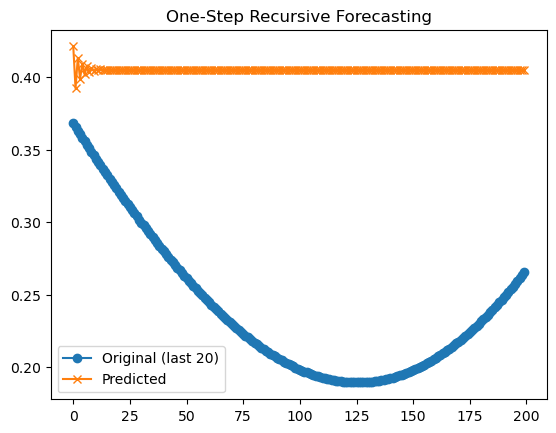

In [ ]:
# Initialize input andlight caffeine blend list to store predictions
x_input = last_twenty[0].reshape((1, n_steps))  # start with the first value
predictions = []

# Loop to predict one step at a time
for i in range(len(last_twenty)):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    
    # update input to next step — use prediction as input
    x_input = yhat.reshape((1, n_steps))

# Convert predictions to numpy array
predictions = np.array(predictions)

# Plot
plt.plot(last_twenty, label='Original (last 20)', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.legend()
plt.title('One-Step Recursive Forecasting')
plt.show()

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import skew

# Assuming last_twenty is a 1D numpy array
x_input = last_twenty[0].reshape((1, n_steps))  # Starting point
predictions = []

for _ in range(len(last_twenty)):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    x_input = yhat.reshape((1, n_steps))  # Recursive input

predictions = np.array(predictions)


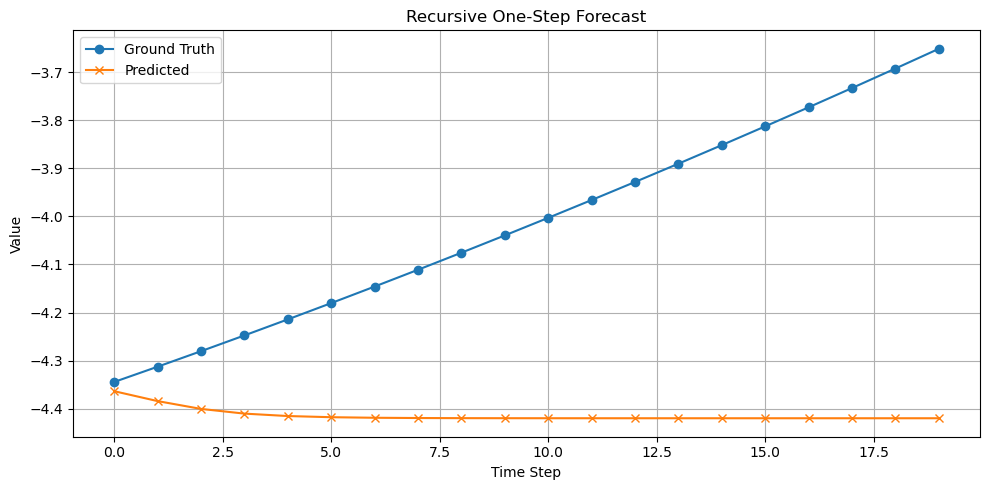

In [131]:
plt.figure(figsize=(10, 5))
plt.plot(last_twenty, label='Ground Truth', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.title('Recursive One-Step Forecast')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [132]:
true = last_twenty
pred = predictions

In [133]:
from sklearn import metrics
from scipy.stats import skew
import numpy as np

metric_dict = {
    "MAE": metrics.mean_absolute_error(true, pred),
    "MSE": metrics.mean_squared_error(true, pred),
    "RMSE": np.sqrt(metrics.mean_squared_error(true, pred)),
    "R2": metrics.r2_score(true, pred),
    "Explained Variance": metrics.explained_variance_score(true, pred),
    "Max Error": metrics.max_error(true, pred),
    "Median AE": metrics.median_absolute_error(true, pred),
    "Mean Bias": np.mean(pred - true),
    "Mean Forecast": np.mean(pred),
    "Mean Ground Truth": np.mean(true),
    "Std Forecast": np.std(pred),
    "Std Ground Truth": np.std(true),
    "MASE": np.mean(np.abs(pred - true)) / np.mean(np.abs(np.diff(true))),
    "MAPE": np.mean(np.abs((true - pred) / true)) * 100 if np.all(true != 0) else np.nan,
    "SMAPE": 100 * np.mean(2 * np.abs(pred - true) / (np.abs(pred) + np.abs(true))),
    "NRMSE": np.sqrt(metrics.mean_squared_error(true, pred)) / (np.max(true) - np.min(true)),
    "Cosine Similarity": metrics.pairwise.cosine_similarity(true.reshape(1, -1), pred.reshape(1, -1))[0, 0],
    "Pearson r": np.corrcoef(true, pred)[0, 1],
    "Skew True": skew(true),
    "Skew Pred": skew(pred),
}


In [134]:
print("📊 Forecast Evaluation Metrics (Last 20 Points):\n")
for name, val in metric_dict.items():
    print(f"{name:<20}: {val:.6f}")


📊 Forecast Evaluation Metrics (Last 20 Points):

MAE                 : 0.400436
MSE                 : 0.208640
RMSE                : 0.456772
R2                  : -3.713705
Explained Variance  : -0.091018
Max Error           : 0.767950
Median AE           : 0.398267
Mean Bias           : -0.400436
Mean Forecast       : -4.413164
Mean Ground Truth   : -4.012727
Std Forecast        : 0.014296
Std Ground Truth    : 0.210387
MASE                : 10.987037
MAPE                : 10.296035
SMAPE               : 9.635029
NRMSE               : 0.659618
Cosine Similarity   : 0.998515
Pearson r           : -0.635779
Skew True           : 0.097604
Skew Pred           : 2.504854


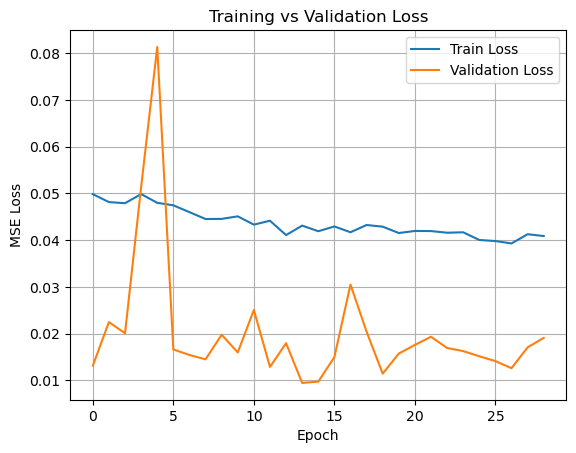

In [126]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# CNN

## Univariate

### One-Step

In [82]:
# univariate data preparation
from numpy import array

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i +n_steps
        if end_ix > len(sequence) - 1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [83]:
train_data

array([0.44811656, 0.4480149 , 0.44791443, ..., 0.90062263, 0.90047727,
       0.90025037])

In [115]:
# choose a number of time steps
n_steps = 1
# split into samples
X, y = split_sequence(train_data, n_steps)   

In [105]:
X.shape

(7999, 1)

In [106]:
y.shape

(7999,)

In [116]:
# summarize the data
for i in range(len(X)):
    print(X[i],y[i])

[0.44811656] 0.4480149030581577
[0.4480149] 0.4479144317814097
[0.44791443] 0.44781505755579926
[0.44781506] 0.4477166925672069
[0.44771669] 0.4476192540214631
[0.44761925] 0.447522663292553
[0.44752266] 0.44742681150329144
[0.44742681] 0.4473316282211968
[0.44733163] 0.44723706990745105
[0.44723707] 0.44714309354190457
[0.44714309] 0.44704965662307633
[0.44704966] 0.44695671716815405
[0.44695672] 0.4468642337129939
[0.44686423] 0.4467721653121208
[0.44677217] 0.4466804715387281
[0.44668047] 0.44658911248467786
[0.44658911] 0.4464980487605008
[0.44649805] 0.4464072414953961
[0.44640724] 0.4463166523372317
[0.44631665] 0.44622624345254397
[0.44622624] 0.446135977526538
[0.44613598] 0.44604581776308744
[0.44604582] 0.4459557278847346
[0.44595573] 0.4458656721326903
[0.44586567] 0.4457756162096066
[0.44577562] 0.4456855649006787
[0.44568556] 0.4455955230453022
[0.44559552] 0.4455054817659285
[0.44550548] 0.44541543243785736
[0.44541543] 0.4453253666892367
[0.44532537] 0.445235276401063
[0

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [118]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [119]:
X.shape

(7999, 1, 1)

In [122]:
# define model
model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation = 'relu', input_shape=(n_steps, n_features)))
#model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [124]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
]

In [125]:
history = model.fit(X, y,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.1,
                    shuffle=False,
                    callbacks=callbacks,
                    verbose=1)

Epoch 1/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6150e-04 - val_loss: 2.0574e-04 - learning_rate: 0.0010
Epoch 2/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9811e-05 - val_loss: 1.5205e-04 - learning_rate: 0.0010
Epoch 3/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8490e-05 - val_loss: 1.1855e-05 - learning_rate: 0.0010
Epoch 4/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8720e-06 - val_loss: 8.7826e-06 - learning_rate: 0.0010
Epoch 5/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0482e-06 - val_loss: 1.3672e-05 - learning_rate: 0.0010
Epoch 6/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1136e-05 - val_loss: 2.0677e-05 - learning_rate: 0.0010
Epoch 7/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3279e-05 - val_loss: 2.8159e-05 - learning_rate: 0.0010
Epoch 8/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5554e-05 - val_loss: 3.2836e-05 - learning_rate: 0.0010
Epoch 9/300
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

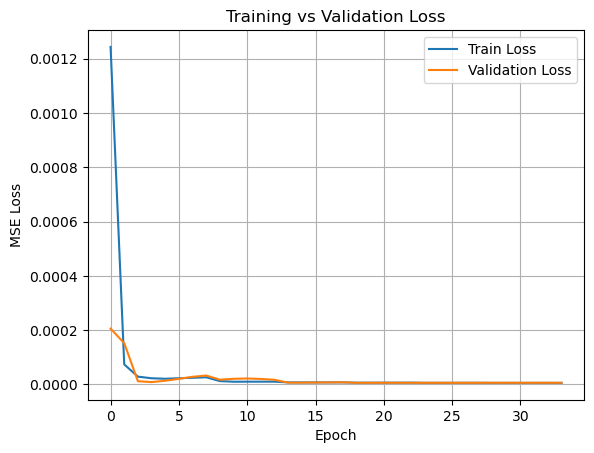

In [127]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
train_data[-1]

0.9002503737704822

In [133]:
# demonstrare prediction
x_input = array([0.9002503737704822])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [144]:
test_data[0]

0.8999406943117156

In [134]:
print(yhat)

[[0.89992774]]


In [135]:
# demonstrare prediction
x_input = array([0.89992774])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [143]:
test_data[1]

0.8995470012993821

In [136]:
print(yhat)

[[0.8996058]]


In [ ]:
uno = train_data[-1]
uno = uno.reshape((1, n_steps, n_features))
yhat = model.predict(uno, verbose=0)

test_data

In [162]:
uno = train_data[-1]
uno = uno.reshape((1, n_steps, n_features))
yhat = model.predict(uno, verbose=0)

In [163]:
uno.shape

(1, 1, 1)

In [164]:
print(yhat)

[[0.89992774]]


In [165]:
yhat.shape

(1, 1)

In [167]:
yhat[0, 0]

0.89992774

In [ ]:
yhat = model.predict(x_input, verbose=0)

In [179]:
from sklearn import metrics

In [187]:
true_data = test_data 

In [188]:
true_data[0]

0.8999406943117156

In [185]:
uno = train_data[-1]

In [186]:
uno

0.9002503737704822

In [189]:
metrics.mean_squared_error(true_data[0], true_data[0])

InvalidParameterError: The 'y_true' parameter of mean_squared_error must be an array-like. Got 0.8999406943117156 instead.

In [ ]:
from sklearn import metrics
from scipy.stats import skew
import numpy as np

# what we are aiming for
true_data = test_data 
# Initialize input, start with the last value of the training data
uno = train_data[-1]
# reshape so we can feed it to the model
uno = uno.reshape((1, n_steps, n_features)) 
# List to store predictions
predictions = []
# List to record the error evolution
errors = []
# Set a treshold to stop the model wehn it fails
treshold = 1

# Loop to predict one step at a time
for i in range(len(test_data)):

    if metrics.mean_squared_error(true_data[i], uno) > treshold:
        break
    else: 
        yhat = model.predict(uno, verbose=0)
        predictions.append(yhat[0, 0])
    
    # update input to next step — use prediction as input
    uno = yhat.reshape((1, n_steps, n_features))

# Convert predictions to numpy array
predictions = np.array(predictions)

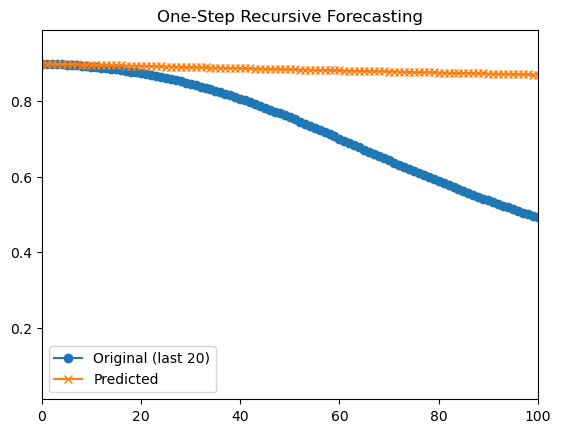

In [177]:
# Plot
plt.plot(test_data, label='Original (last 20)', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.legend()
plt.xlim(0,100)
plt.title('One-Step Recursive Forecasting')
plt.show()

# LSTM

### Loading Libraries and Data

In [365]:
# Rossler from Scratch

from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import matplotlib.pyplot as plt

In [366]:
### Rossler sample

#rossler_sample_1 = all_x20[all_x20['id'] == 1].copy()
#rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x', 'y'] ].copy()
rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x'] ].copy()

rossler_sample_1.head()

,x
0,0.100000
1,0.097913
2,0.095850
3,0.093809
4,0.091790


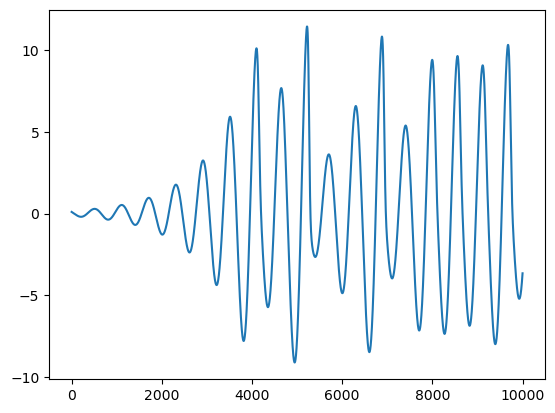

In [367]:
rossler_sample_1['x'].plot()
plt.show()

### Data Preparation

In [473]:
# Apply a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(rossler_sample_1), columns = ['x'])

In [474]:
df['x'].head(10)

0    0.448117
1    0.448015
2    0.447914
3    0.447815
4    0.447717
5    0.447619
6    0.447523
7    0.447427
8    0.447332
9    0.447237
Name: x, dtype: float64

In [475]:
# Preparing the sequence data
ylist = list(df['x'])

n_future = 10
n_past = 10
total_period = 2 * 10 

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []

while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

# converting list of lists to numpy array
import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

In [476]:
# after your while‑loop and conversion to numpy
X_new = X_new[::-1]
y_new = y_new[::-1]

In [477]:
X_new[0]

array([0.4480149 , 0.44791443, 0.44781506, 0.44771669, 0.44761925,
       0.44752266, 0.44742681, 0.44733163, 0.44723707, 0.44714309])

In [478]:
X_new[1]

array([0.44791443, 0.44781506, 0.44771669, 0.44761925, 0.44752266,
       0.44742681, 0.44733163, 0.44723707, 0.44714309, 0.44704966])

In [479]:
y_new[0]

array([0.44704966, 0.44695672, 0.44686423, 0.44677217, 0.44668047,
       0.44658911, 0.44649805, 0.44640724, 0.44631665, 0.44622624])

In [437]:
# suppose X_new and y_new are already in chronological order
n = len(X_new)
train_end = int(0.95 * n)

X_train = X_new[:train_end]
y_train = y_new[:train_end]

X_test  = X_new[train_end:]
y_test  = y_new[train_end:]

In [438]:
X_train

array([[0.4480149 , 0.44791443, 0.44781506, ..., 0.44733163, 0.44723707,
        0.44714309],
       [0.44791443, 0.44781506, 0.44771669, ..., 0.44723707, 0.44714309,
        0.44704966],
       [0.44781506, 0.44771669, 0.44761925, ..., 0.44714309, 0.44704966,
        0.44695672],
       ...,
       [0.20502513, 0.20849009, 0.21198821, ..., 0.22996505, 0.23365534,
        0.2373765 ],
       [0.20849009, 0.21198821, 0.21551918, ..., 0.23365534, 0.2373765 ,
        0.24112816],
       [0.21198821, 0.21551918, 0.21908268, ..., 0.2373765 , 0.24112816,
        0.24490999]])

In [439]:
y_train

array([[0.44704966, 0.44695672, 0.44686423, ..., 0.44640724, 0.44631665,
        0.44622624],
       [0.44695672, 0.44686423, 0.44677217, ..., 0.44631665, 0.44622624,
        0.44613598],
       [0.44686423, 0.44677217, 0.44668047, ..., 0.44622624, 0.44613598,
        0.44604582],
       ...,
       [0.24112816, 0.24490999, 0.24872161, ..., 0.26821409, 0.27219685,
        0.27620682],
       [0.24490999, 0.24872161, 0.25256268, ..., 0.27219685, 0.27620682,
        0.2802436 ],
       [0.24872161, 0.25256268, 0.25643284, ..., 0.27620682, 0.2802436 ,
        0.28430681]])

In [440]:
# Reshape the data to be recognized by Keras

batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features)
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features)

### Model 1

In [441]:

# One-Layer LSTM
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

random.seed(42)

batch_size = 32

model_1 = Sequential([
    LSTM(64, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dense(y_train.shape[1])
])


/home/think/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model 2

In [306]:
### Model 2

from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

inputs = Input(shape=(n_timesteps, n_features))
x = LSTM(64, activation='tanh')(inputs)
y = Dense(y_train.shape[1])(x)

# Residual connection (assumes shapes match)
residual = Dense(y_train.shape[1])(inputs[:, -1, :])  # last timestep
output = Add()([y, residual])

model_2 = Model(inputs, output)

### Model 3

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(64, activation='tanh'), input_shape=(n_timesteps, n_features)),
    Dense(y_train.shape[1])
])


### Model 4


In [ ]:
from tensorflow.keras.layers import Conv1D, LSTM, Flatten

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
    LSTM(64),
    Dense(y_train.shape[1])
])



### Model 5


In [ ]:
from tensorflow.keras.layers import RepeatVector, TimeDistributed

model = Sequential([
    LSTM(64, activation='tanh', input_shape=(n_timesteps, n_features)),
    RepeatVector(1),  # since we forecast one step
    LSTM(64, activation='tanh', return_sequences=True),
    TimeDistributed(Dense(y_train.shape[1]))
])


### Model not included

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Dropout

model = Sequential([
    # encoder
    LSTM(128, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dropout(0.2),
    RepeatVector(n_timesteps),            # repeat latent for each future step

    # decoder
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(64, activation='relu')),
    TimeDistributed(Dense(1)),             # one output per timestep
])
model.compile('adam', loss='mae')

### Beast Model

In [351]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    Input, Conv1D, LayerNormalization,
    Bidirectional, LSTM, Dropout, Attention,
    Add, Dense
)
from tensorflow.keras.models import Model

# --- Define the beast ---
inputs = Input(shape=(n_timesteps, n_features))

# 1) Local feature extraction
x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(inputs)
x = LayerNormalization()(x)

# 2) First bidirectional LSTM stack
x_enc = Bidirectional(LSTM(128, return_sequences=True))(x)
x_enc = Dropout(0.3)(x_enc)

# 3) Self-attention over all timesteps
attn = Attention()([x_enc, x_enc])
x_res1 = Add()([x_enc, attn])             # Residual connection

# 4) Second bidirectional LSTM (encoder→decoder style)
x_dec = Bidirectional(LSTM(64, return_sequences=False))(x_res1)
x_dec = Dropout(0.3)(x_dec)

# 5) Residual skip from last input timestep
skip = Dense(y_train.shape[1])(inputs[:, -1, :])

# 6) Final projection + residual
out_dense = Dense(y_train.shape[1])(x_dec)
outputs = Add()([out_dense, skip])

beast_model = Model(inputs=inputs, outputs=outputs, name="BeastLSTM")

### Model initialization

In [442]:
current_model = model_1

In [443]:
current_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,546 (68.54 KB)

 Trainable params: 17,546 (68.54 KB)

 Non-trainable params: 0 (0.00 B)

In [444]:
import keras

current_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'],
)

In [445]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
]

In [446]:
smod_history = current_model.fit(X_train_rs, y_train,
                                validation_split=0.2,
                                epochs=100,
                                batch_size=batch_size,
                                shuffle = False,
                                callbacks = callbacks,
                                verbose = 1
                                )

Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381 - learning_rate: 0.0100
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.1268 - val_mean_absolute_error: 0.1268 - learning_rate: 0.0100
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - val_loss: 0.0561 - val_mean_absolute_error: 0.0561 - learning_rate: 0.0100
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0795 - val_mean_absolute_error: 0.0795 - learning_rate: 0.0100
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425 - learning_rate: 0.0100
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - val_loss: 0.0551 - val_me

### One step to one step forecasting

In [311]:
X_test  = X_new[train_end:]
y_test  = y_new[train_end:]

In [312]:
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features)

In [313]:
X_test_rs

array([[[0.2802436 ]],

       [[0.28430681]],

       [[0.28839604]],

       [[0.2925109 ]],

       [[0.29665098]],

       [[0.30081587]],

       [[0.30500517]],

       [[0.30921848]],

       [[0.31345537]],

       [[0.31771542]],

       [[0.32199822]],

       [[0.32630333]],

       [[0.33063032]],

       [[0.33497876]],

       [[0.33934822]],

       [[0.34373825]],

       [[0.34814841]],

       [[0.35257825]],

       [[0.35702733]],

       [[0.36149519]],

       [[0.36598138]],

       [[0.37048544]],

       [[0.3750069 ]],

       [[0.37954531]],

       [[0.38410018]],

       [[0.38867106]],

       [[0.39325747]],

       [[0.39785893]],

       [[0.40247496]],

       [[0.40710507]],

       [[0.41174878]],

       [[0.41640559]],

       [[0.42107503]],

       [[0.42575661]],

       [[0.43044984]],

       [[0.43515422]],

       [[0.43986924]],

       [[0.44459439]],

       [[0.44932918]],

       [[0.45407309]],

       [[0.45882562]],

       [[0.46358

In [314]:
y_test

array([[0.28430681],
       [0.28839604],
       [0.2925109 ],
       [0.29665098],
       [0.30081587],
       [0.30500517],
       [0.30921848],
       [0.31345537],
       [0.31771542],
       [0.32199822],
       [0.32630333],
       [0.33063032],
       [0.33497876],
       [0.33934822],
       [0.34373825],
       [0.34814841],
       [0.35257825],
       [0.35702733],
       [0.36149519],
       [0.36598138],
       [0.37048544],
       [0.3750069 ],
       [0.37954531],
       [0.38410018],
       [0.38867106],
       [0.39325747],
       [0.39785893],
       [0.40247496],
       [0.40710507],
       [0.41174878],
       [0.41640559],
       [0.42107503],
       [0.42575661],
       [0.43044984],
       [0.43515422],
       [0.43986924],
       [0.44459439],
       [0.44932918],
       [0.45407309],
       [0.45882562],
       [0.46358625],
       [0.46835448],
       [0.47312977],
       [0.47791163],
       [0.48269953],
       [0.48749294],
       [0.49229136],
       [0.497

In [ ]:
0.2802436

In [356]:
# demonstrate prediction
x_input = array([0.2802436])
x_input = x_input.reshape((1, n_steps))
yhat = beast_model.predict(x_input, verbose=0)

/home/think/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [357]:
print(yhat)

[[0.28023988]]


In [ ]:
0.28430681

In [248]:
X_test_rs.shape

(500, 1, 1)

In [256]:
X_test_rs[:50, 0, :]
#X_test_rs[1,:]

array([[0.2802436 ],
       [0.28430681],
       [0.28839604],
       [0.2925109 ],
       [0.29665098],
       [0.30081587],
       [0.30500517],
       [0.30921848],
       [0.31345537],
       [0.31771542],
       [0.32199822],
       [0.32630333],
       [0.33063032],
       [0.33497876],
       [0.33934822],
       [0.34373825],
       [0.34814841],
       [0.35257825],
       [0.35702733],
       [0.36149519],
       [0.36598138],
       [0.37048544],
       [0.3750069 ],
       [0.37954531],
       [0.38410018],
       [0.38867106],
       [0.39325747],
       [0.39785893],
       [0.40247496],
       [0.40710507],
       [0.41174878],
       [0.41640559],
       [0.42107503],
       [0.42575661],
       [0.43044984],
       [0.43515422],
       [0.43986924],
       [0.44459439],
       [0.44932918],
       [0.45407309],
       [0.45882562],
       [0.46358625],
       [0.46835448],
       [0.47312977],
       [0.47791163],
       [0.48269953],
       [0.48749294],
       [0.492

In [254]:
y_test[:50,0]

array([0.28430681, 0.28839604, 0.2925109 , 0.29665098, 0.30081587,
       0.30500517, 0.30921848, 0.31345537, 0.31771542, 0.32199822,
       0.32630333, 0.33063032, 0.33497876, 0.33934822, 0.34373825,
       0.34814841, 0.35257825, 0.35702733, 0.36149519, 0.36598138,
       0.37048544, 0.3750069 , 0.37954531, 0.38410018, 0.38867106,
       0.39325747, 0.39785893, 0.40247496, 0.40710507, 0.41174878,
       0.41640559, 0.42107503, 0.42575661, 0.43044984, 0.43515422,
       0.43986924, 0.44459439, 0.44932918, 0.45407309, 0.45882562,
       0.46358625, 0.46835448, 0.47312977, 0.47791163, 0.48269953,
       0.48749294, 0.49229136, 0.49709425, 0.50190109, 0.50671135])

In [257]:
yupi = X_test_rs[:50, 0, :]

In [ ]:
len(yupi)e

50

In [258]:
yupi[0].reshape((1, n_steps)) 

array([[0.2802436]])

In [262]:
y_test[:50]

array([[0.28430681],
       [0.28839604],
       [0.2925109 ],
       [0.29665098],
       [0.30081587],
       [0.30500517],
       [0.30921848],
       [0.31345537],
       [0.31771542],
       [0.32199822],
       [0.32630333],
       [0.33063032],
       [0.33497876],
       [0.33934822],
       [0.34373825],
       [0.34814841],
       [0.35257825],
       [0.35702733],
       [0.36149519],
       [0.36598138],
       [0.37048544],
       [0.3750069 ],
       [0.37954531],
       [0.38410018],
       [0.38867106],
       [0.39325747],
       [0.39785893],
       [0.40247496],
       [0.40710507],
       [0.41174878],
       [0.41640559],
       [0.42107503],
       [0.42575661],
       [0.43044984],
       [0.43515422],
       [0.43986924],
       [0.44459439],
       [0.44932918],
       [0.45407309],
       [0.45882562],
       [0.46358625],
       [0.46835448],
       [0.47312977],
       [0.47791163],
       [0.48269953],
       [0.48749294],
       [0.49229136],
       [0.497

In [265]:
len(X_test_rs)

500

In [358]:
# Initialize input andlight caffeine blend list to store predictions
x_input = X_test_rs[0].reshape((1, n_steps))  # start with the first value
predictions = []

# Loop to predict one step at a time
for i in range(len(X_test_rs)):
    yhat = beast_model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    
    # update input to next step — use prediction as input
    x_input = yhat.reshape((1, n_steps))

# Convert predictions to numpy array
predictions = np.array(predictions)

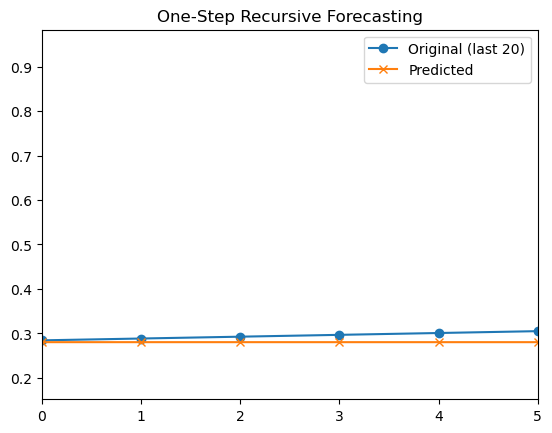

In [359]:
# Plot
plt.plot(y_test, label='Original (last 20)', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.legend()
plt.title('One-Step Recursive Forecasting')
plt.xlim(0,5)
plt.show()

In [360]:
predictions.shape

(500,)

In [361]:
y_test = y_test.reshape((500,))
#y_test.shape

In [362]:
true = y_test
pred = predictions

In [363]:
from sklearn import metrics
from scipy.stats import skew
import numpy as np

metric_dict = {
    "MAE": metrics.mean_absolute_error(true, pred),
    "MSE": metrics.mean_squared_error(true, pred),
    "RMSE": np.sqrt(metrics.mean_squared_error(true, pred)),
    "R2": metrics.r2_score(true, pred),
    "Explained Variance": metrics.explained_variance_score(true, pred),
    "Max Error": metrics.max_error(true, pred),
    "Median AE": metrics.median_absolute_error(true, pred),
    "Mean Bias": np.mean(pred - true),
    "Mean Forecast": np.mean(pred),
    "Mean Ground Truth": np.mean(true),
    "Std Forecast": np.std(pred),
    "Std Ground Truth": np.std(true),
    "MASE": np.mean(np.abs(pred - true)) / np.mean(np.abs(np.diff(true))),
    "MAPE": np.mean(np.abs((true - pred) / true)) * 100 if np.all(true != 0) else np.nan,
    "SMAPE": 100 * np.mean(2 * np.abs(pred - true) / (np.abs(pred) + np.abs(true))),
    "NRMSE": np.sqrt(metrics.mean_squared_error(true, pred)) / (np.max(true) - np.min(true)),
    "Cosine Similarity": metrics.pairwise.cosine_similarity(true.reshape(1, -1), pred.reshape(1, -1))[0, 0],
    "Pearson r": np.corrcoef(true, pred)[0, 1],
    "Skew True": skew(true),
    "Skew Pred": skew(pred),
}

In [364]:
print("📊 Forecast Evaluation Metrics (Last 20 Points):\n")
for name, val in metric_dict.items():
    print(f"{name:<20}: {val:.6f}")

📊 Forecast Evaluation Metrics (Last 20 Points):

MAE                 : 0.256114
MSE                 : 0.117800
RMSE                : 0.343220
R2                  : -0.665453
Explained Variance  : 0.000749
Max Error           : 0.665478
Median AE           : 0.142117
Mean Bias           : -0.217075
Mean Forecast       : 0.279732
Mean Ground Truth   : 0.496807
Std Forecast        : 0.000213
Std Ground Truth    : 0.265954
MASE                : 85.629715
MAPE                : 42.323205
SMAPE               : 54.521744
NRMSE               : 0.454177
Cosine Similarity   : 0.881790
Pearson r           : 0.468269
Skew True           : 0.416449
Skew Pred           : 0.725053


### Sewquence to one step forecasting

In [447]:
X_test_rs[0]

array([[0.21551918],
       [0.21908268],
       [0.22267838],
       [0.22630594],
       [0.22996505],
       [0.23365534],
       [0.2373765 ],
       [0.24112816],
       [0.24490999],
       [0.24872161]])

In [448]:
X_test_rs[1]

array([[0.21908268],
       [0.22267838],
       [0.22630594],
       [0.22996505],
       [0.23365534],
       [0.2373765 ],
       [0.24112816],
       [0.24490999],
       [0.24872161],
       [0.25256268]])

In [449]:
y_test[0]

array([0.25256268, 0.25643284, 0.2603317 , 0.26425891, 0.26821409,
       0.27219685, 0.27620682, 0.2802436 , 0.28430681, 0.28839604])

In [450]:
y_test[1]

array([0.25643284, 0.2603317 , 0.26425891, 0.26821409, 0.27219685,
       0.27620682, 0.2802436 , 0.28430681, 0.28839604, 0.2925109 ])

In [422]:
X_test_rs[0].shape

(10, 1)

In [467]:
# demonstrate prediction
x_input = X_test_rs[0]
x_input = x_input.reshape((1, n_steps))
yhat = current_model.predict(x_input, verbose=0)

In [462]:
X_test_rs[0].shape

(10, 1)

In [463]:
yhat[0].shape

(10,)

In [468]:
print(yhat)

[[0.2528124  0.2564089  0.2607965  0.264323   0.2686297  0.2728697
  0.27661082 0.28089863 0.28484327 0.28869426]]


In [469]:
y_test[0]

array([0.25256268, 0.25643284, 0.2603317 , 0.26425891, 0.26821409,
       0.27219685, 0.27620682, 0.2802436 , 0.28430681, 0.28839604])

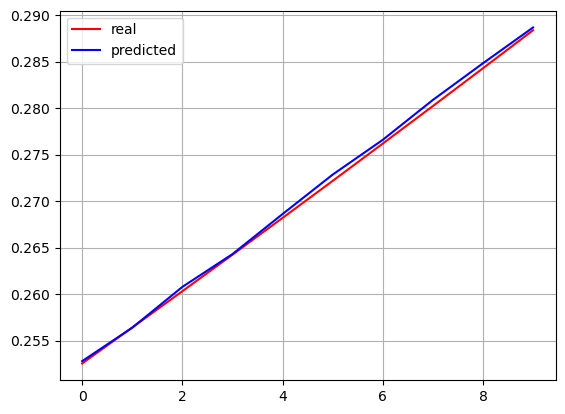

In [471]:
plt.plot(y_test[0], color='r', label = 'real')
plt.plot(yhat[0], color = 'blue', label = 'predicted')
plt.legend()
plt.grid()
plt.show()

### Beast Model

In [ ]:
# --- Compile as requested ---
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'],
)


In [ ]:
# --- Fit as requested ---
smod_history = model.fit(
    X_train_rs, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
### INterpreting model

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(X_test_rs)

# flatten to 1D
y_pred = preds.ravel()
y_true = y_test.ravel()

# if they correspond to time steps t = t0, t0+1, ..., t0+1999
t = np.arange(len(y_pred))

plt.figure(figsize=(12,4))
plt.plot(t, y_true, label='actual', linewidth=1)
plt.plot(t, y_pred, label='predicted', linewidth=1, alpha=0.8)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, s=10, alpha=0.3)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', linewidth=1, label='perfect')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(preds,y_test))

In [ ]:
### One Step Forecasting

import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assume simple_model is your trained one-step LSTM,
# X_test_rs has shape (2000, 1, 1), and
# y_test has shape (2000, 1).

# 1. Grab the very first test input (seed) and the next 20 true points
seed_window = X_test_rs[0].reshape(-1)   # shape (1,) → just the single last observed point
true_continuation = y_test[:2].ravel()  # the next 20 true points, y_test[0]..y_test[19]

# 2. Iteratively forecast
horizon = 2
preds_iter = []
current_input = seed_window.copy()       # will update this each step

for i in range(horizon):
    # model.predict expects shape (batch, timesteps, features)
    x_in = current_input.reshape(1, 1, 1)
    y_hat = model.predict(x_in, verbose=0)[0, 0]
    preds_iter.append(y_hat)

    # slide the window: drop oldest point, append prediction
    current_input = np.array([y_hat])

preds_iter = np.array(preds_iter)

# 3. Compute error metrics
mae20 = mean_absolute_error(true_continuation, preds_iter)
print(f"MAE over {horizon}-step iterative forecast: {mae20:.4f}")

# 4. Plot true vs. predicted over the 20-step horizon
plt.figure(figsize=(8,3))
steps = np.arange(1, horizon+1)
plt.plot(steps, true_continuation, 'o-', label='true')
plt.plot(steps, preds_iter, 's--', label='iterative pred')
plt.xlabel('Forecast step')
plt.ylabel('Value')
plt.title(f'20-step Iterative Forecast (MAE={mae20:.4f})')
plt.legend()
plt.grid(True)
plt.show()